## How to Identify and Remove **`Seasonality`** from Time Series Data with Python

In [10]:
from pandas import read_csv
import matplotlib.pyplot as plt

In [15]:
# Read the CSV file
series = read_csv('Daily_Min_Temp.csv', header=0, index_col=0, parse_dates = True)

># a. Seasonal Adjustment with Differencing

<Figure size 1200x600 with 0 Axes>

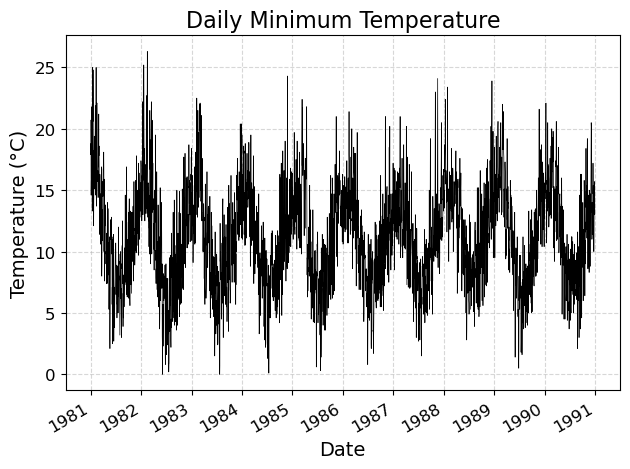

In [16]:
# Plotting with customizations
plt.figure(figsize=(12, 6))  # Adjust figure size
series.plot(style='k', legend=None, linewidth=0.5)  # Plot the series with reduced line width

# Customizing labels and title
plt.title('Daily Minimum Temperature', fontsize=16)  # Set the title with an appropriate font size
plt.xlabel('Date', fontsize=14)  # Label for x-axis
plt.ylabel('Temperature (°C)', fontsize=14)  # Label for y-axis

# Adding gridlines and improving readability
plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines with a dashed style and reduced opacity
plt.xticks(fontsize=12)  # Adjust x-axis tick labels font size
plt.yticks(fontsize=12)  # Adjust y-axis tick labels font size

plt.tight_layout()  # Improve spacing
plt.show()

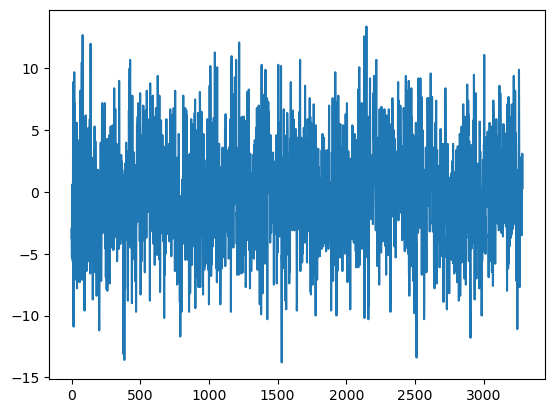

In [17]:
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()

                 Temp
Date                 
1981-01-31  17.712903
1981-02-28  17.678571
1981-03-31  13.500000
1981-04-30  12.356667
1981-05-31   9.490323
1981-06-30   7.306667
1981-07-31   7.577419
1981-08-31   7.238710
1981-09-30  10.143333
1981-10-31  10.087097
1981-11-30  11.890000
1981-12-31  13.680645
1982-01-31  16.567742


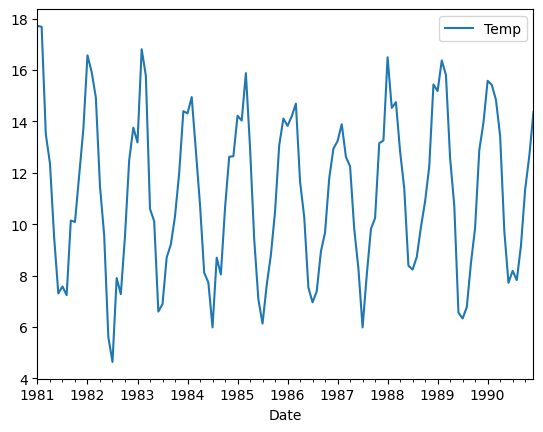

In [18]:
resample = series.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13))
monthly_mean.plot()
plt.show()

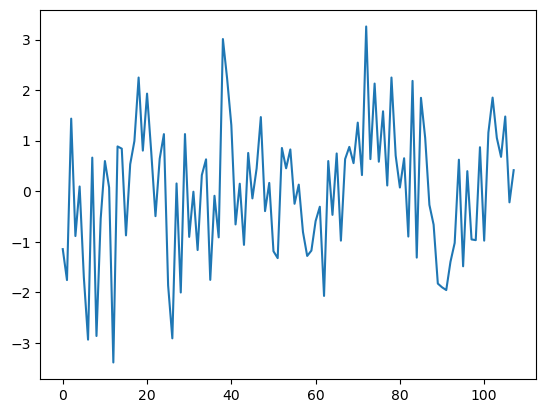

In [20]:
resample = series.resample('M')
monthly_mean = resample.mean()
X = series.values
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean.iloc[i] - monthly_mean.iloc[i - months_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()

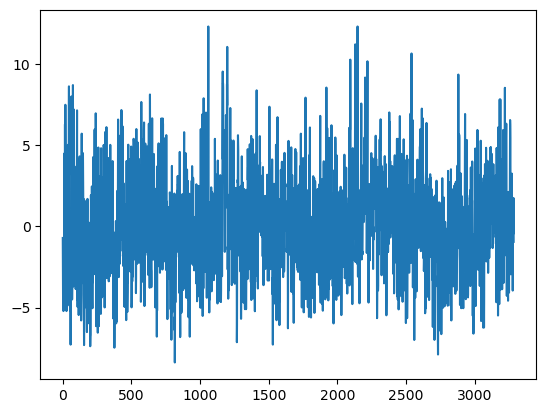

In [22]:
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    month_str = str(series.index[i].year-1)+'-'+str(series.index[i].month)
    month_mean_last_year = series.loc[month_str].mean()
    value = X[i] - month_mean_last_year
    diff.append(value)
plt.plot(diff)
plt.show()

># b. Seasonal Adjustment with Modeling

Coefficients: [[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


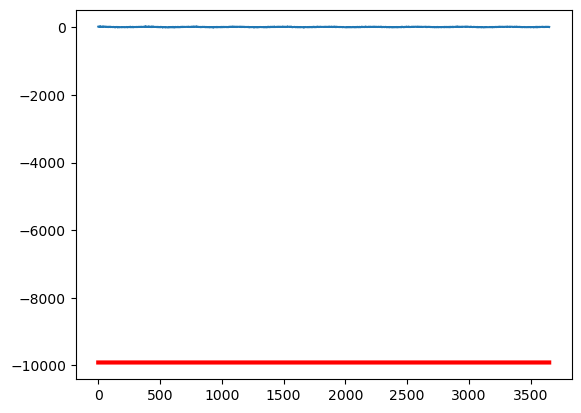

In [27]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit
series = read_csv('Daily_Min_Temp.csv', header=0, index_col=0, parse_dates = True)
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)

# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
        

# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

Coefficients: [[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


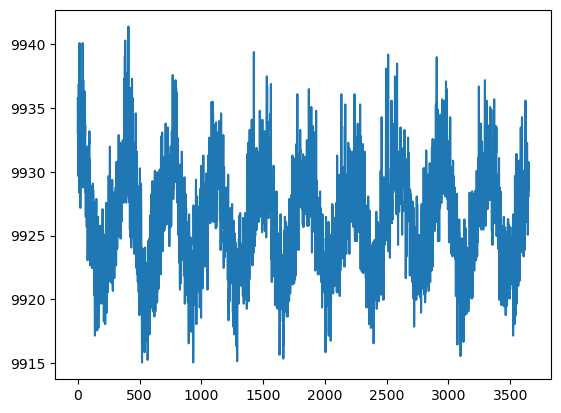

In [30]:
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)

# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)

# create seasonally adjusted
values = series.values
diff = list()
for i in range(len(values)):
    value = values[i] - curve[i]
    diff.append(value)
plt.plot(diff)
plt.show()